In [3]:
#Utilizo la libreria de Pandas
import pandas as pf

In [4]:
#Guardo los datos del CSV en un Data Frame llamado df
df=pf.read_csv("IED_Boyaca_Internet_clean.csv")

In [5]:
#Analizaremos la base de datos de las Instituciones Educativas oficiales de Municipios del Departamento de Boyacá que al periodo de 2024...
#...contaban con servicio de conectividad bajo los proyectos de centros digitales del ministerio de las TIC.

#Para este análisis tomaremos de la base de datos la columna "Estado" para revisar las instituciones que cuentan con el servicio de conectividad o que están en periodo de ejecución.

df.ESTADO.unique()

array(['EN OPERACIÓN', 'PENDIENTE INICIO OPERACIÓN', 'SIN SERVICIO'],
      dtype=object)

In [6]:
#Validamos el tipo de datos de toda la informacion que vamos a analizar.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PROVINCIA                    2006 non-null   object 
 1   MUNICIPIO                    2006 non-null   object 
 2   INSTITUCION_EDUCATIVA        2006 non-null   object 
 3   SEDE_EDUCATIVA               2006 non-null   object 
 4   ZONA                         2006 non-null   object 
 5   PROYECTOS_CONECTIVIDAD_2024  2006 non-null   object 
 6   OPERADOR                     2006 non-null   object 
 7   ESTADO                       2006 non-null   object 
 8   MEDIO_ENLACE                 123 non-null    object 
 9   ANCHO_BANDA_SUBIDA_MB        2006 non-null   float64
 10  ANCHO_BANDA_DESCARGA_MB      2006 non-null   int64  
 11  FINALIZACION_CONTRATO        1104 non-null   object 
 12  LATITUD                      1926 non-null   float64
 13  LONGITUD          

In [7]:
#Importamos las librerias necesarias para iniciar el análisis grafico de la información.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

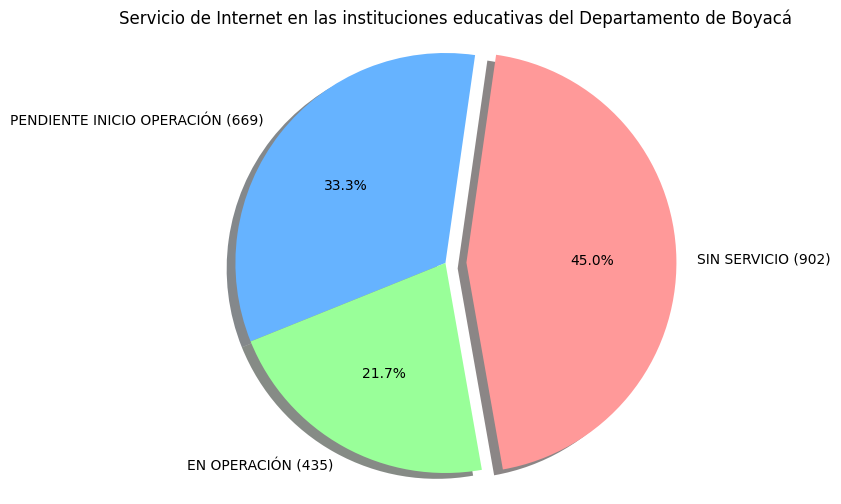

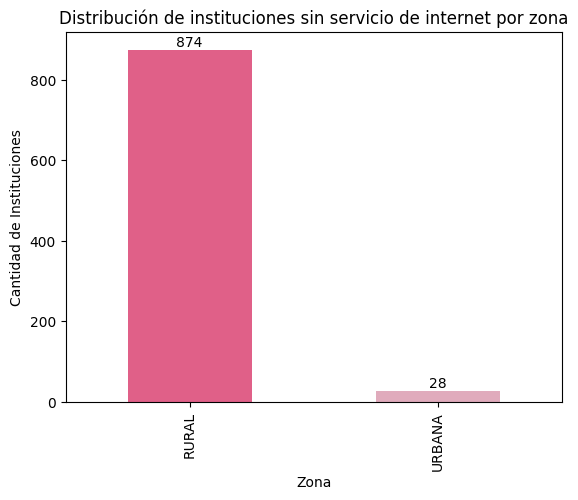

In [ ]:
#Primero analizaremos las instituciones educativas que no contaban, al 2024, con el servicio de internet, y cuantas de estas instituciones se encontraban en zona urbana o rural del Departamento de Boyacá.

#Definimos la variable con la que vamos a trabajar, para que tome los datos de la columna "Estado"
estado_Servicio = df['ESTADO'].value_counts()

#Definimos los parámetros de la gráfica de torta, para que nos muestre el porcentaje y cantidad de instituciones de la totalidad de los datos, pero que nos resalte...
# ...las instituciones que estan reportadas sin servicio de internet: 

labels = [f"{estado} ({cantidad})" for estado, cantidad in estado_Servicio.items()]
explode = [0.1 if ESTADO == 'SIN SERVICIO' else 0 for ESTADO in estado_Servicio.index]
colors = ['#ff9999','#66b3ff', '#99ff99']

plt.figure(figsize=(6, 6))
plt.pie(estado_Servicio, labels=labels, autopct='%1.1f%%', startangle=280, shadow={'ox': -0.03,'edgecolor': 'none', 'shade': 0.9}, explode=explode, colors=colors)
plt.title("Servicio de Internet en las instituciones educativas del Departamento de Boyacá")
plt.axis('equal')
plt.show()

# Ahora analizamos la cantidad de instituciones que no cuentan con servicio de Internet, y la zona en donde se encuentran:
zona_sin_servicio = df[df['ESTADO'] == 'SIN SERVICIO']['ZONA'].value_counts()

zona_sin_servicio.plot(kind='bar', color=['#E06088', '#E0ABBC'])
plt.title("Distribución de instituciones sin servicio de internet por zona")
plt.xlabel("Zona")
plt.ylabel("Cantidad de Instituciones")
# Añadir texto encima de cada barra
for i, valor in enumerate(zona_sin_servicio):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

plt.show()





In [ ]:
#ANALISIS DE LA INFORMACION ARROJADA EN LA GRAFICA ANTERIOR:

#Sobre el estado a 2024 del servicio de internet, indica que mas de tres cuartas partes de las sedes educativas no cuentan con servicio activo de conexion a internet, lo cual representaría.... 
# ....un reto para los proyectos de conectividad del Gobierno.

#En cuanto a las zonas donde se encuentran las instituciones sin servicio de internet, se evidencia una marcada concentracion del problema en el sector rural, lo cual puede deberse a las condiciones geográficas...
#....y de infraestructura necesaria para conseguir este logro.

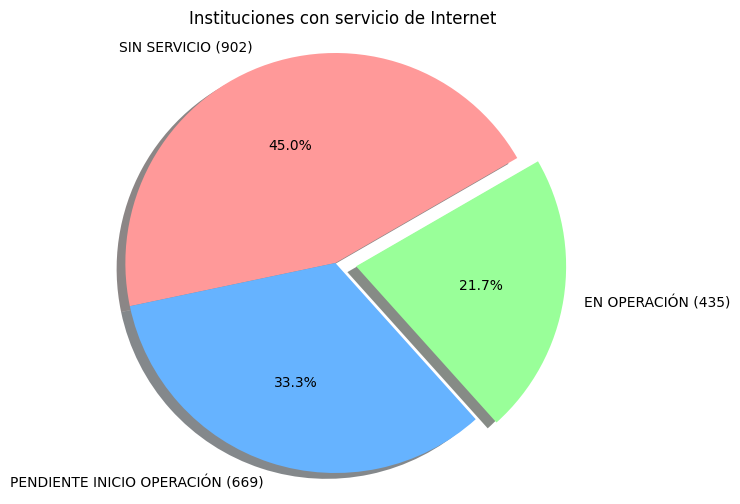

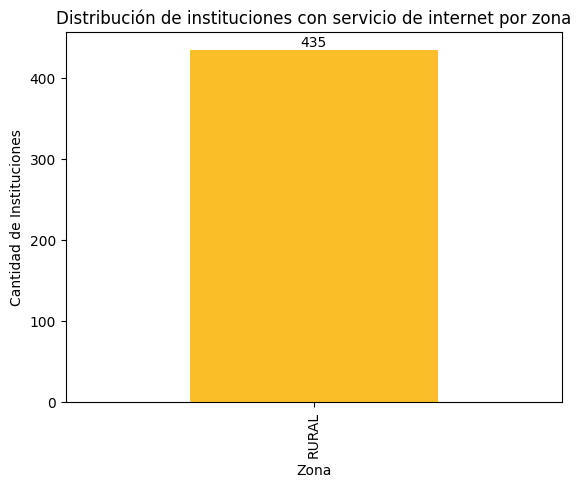

In [ ]:

#Ahora haremos enfasis en las instituciones que si cuentan con el servicio de internet activo


#Definimos la variable con la que vamos a trabajar

instituciones_con_internet = df['ESTADO'].value_counts()

# Definimos los parámetros de la gráfica de torta, para que nos muestre el porcentaje y cantidad de instituciones de la totalidad de los datos, pero que nos resalte...
# ...las instituciones que cuentan con servicio de internet:

labels = [f"{estado} ({cantidad})" for estado, cantidad in instituciones_con_internet.items()]
explode = [0.1 if ESTADO == 'EN OPERACIÓN' else 0 for ESTADO in instituciones_con_internet.index]
colors = ['#ff9999','#66b3ff', '#99ff99']

plt.figure(figsize=(6, 6))
plt.pie(instituciones_con_internet, labels=labels, autopct='%1.1f%%', startangle=390, shadow={'ox': -0.03,'edgecolor': 'none', 'shade': 0.9}, explode=explode, colors=colors)
plt.title("Instituciones con servicio de Internet ")
plt.axis('equal')
plt.show()

# Ahora analizamos la cantidad de instituciones que cuentan con servicio de Internet, y la zona en donde se encuentran::
instituciones_con_internet = df[df['ESTADO'] == 'EN OPERACIÓN']['ZONA'].value_counts()

instituciones_con_internet.plot(kind='bar', color=['#FABE28', '#FA5B28'])
plt.title("Distribución de instituciones con servicio de internet por zona")
plt.xlabel("Zona")
plt.ylabel("Cantidad de Instituciones")
# Añadir texto encima de cada barra
for i, valor in enumerate(instituciones_con_internet):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

plt.show()



In [ ]:
#ANALISIS DE LA INFORMACION ARROJADA EN LA GRAFICA ANTERIOR:

#Se puede evidenciar que tan solo 1 de cada 5 instituciones educativas del departamento, tienen acceso de conexion a internet, lo cual refleja un avance probablemente limitado...
#...frente a las metas y cifras esperadas del proyecto del Gobierno.

#A pesar del bajo porcentaje de instituciones con servicio de internet, se evidencia el claro esfuerzo por priorizar la conexion de internet en la zona rural, dado que es mucho mas complejo el acceso...
# ... que pueden tener los estudiantes en estas zonas.

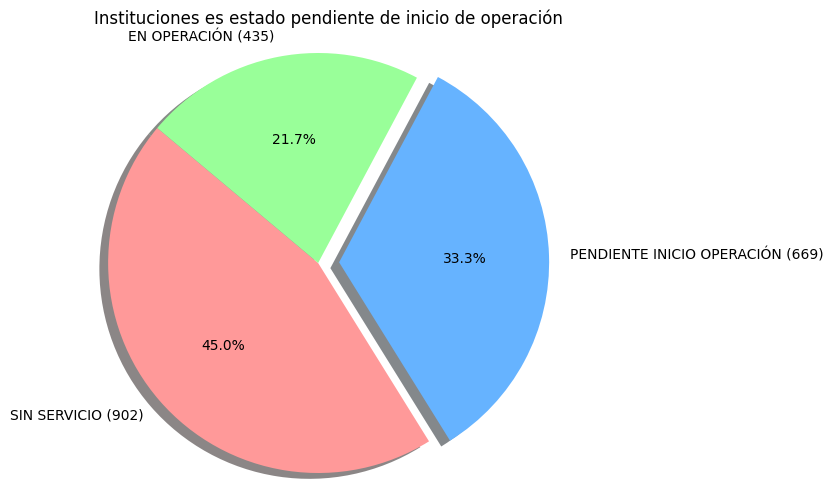

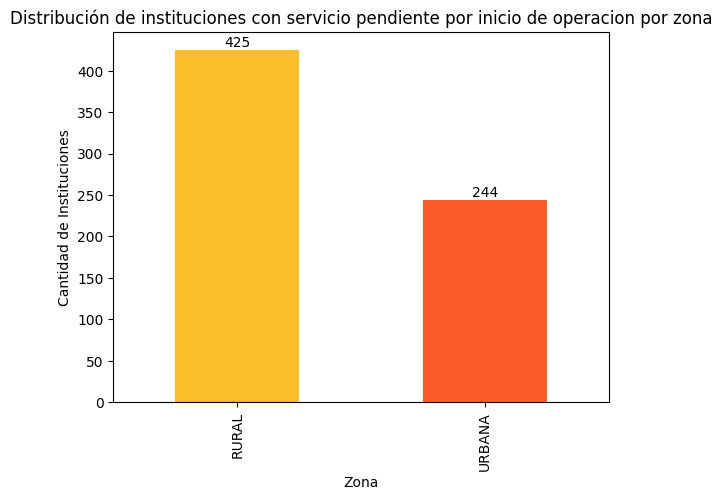

In [13]:
#Ahora haremos enfasis en las instituciones que tienen estado pendiente por inicio de operacion de conectividad.

#Definimos la variable con la que vamos a trabajar

servicio_internet_pendiente = df['ESTADO'].value_counts()

# Definimos los parámetros de la gráfica de torta, para que nos muestre el porcentaje y cantidad de instituciones de la totalidad de los datos, pero que nos resalte...
# ...las instituciones que cuentan aun no cuentan con el servicio de internet, pero que están en proceso de conexion: 

labels = [f"{estado} ({cantidad})" for estado, cantidad in servicio_internet_pendiente.items()]
explode = [0.1 if ESTADO == 'PENDIENTE INICIO OPERACIÓN' else 0 for ESTADO in servicio_internet_pendiente.index]
colors = ['#ff9999','#66b3ff', '#99ff99']

plt.figure(figsize=(6, 6))
plt.pie(servicio_internet_pendiente, labels=labels, autopct='%1.1f%%', startangle=500, shadow={'ox': -0.03,'edgecolor': 'none', 'shade': 0.9}, explode=explode, colors=colors)
plt.title("Instituciones es estado pendiente de inicio de operación")
plt.axis('equal')
plt.show()

# Para resaltar solo los que estan pendientes por inicio de operacion por zona:
servicio_internet_pendiente = df[df['ESTADO'] == 'PENDIENTE INICIO OPERACIÓN']['ZONA'].value_counts()

servicio_internet_pendiente.plot(kind='bar', color=['#FABE28', '#FA5B28'])
plt.title("Distribución de instituciones con servicio pendiente por inicio de operacion por zona")
plt.xlabel("Zona")
plt.ylabel("Cantidad de Instituciones")
# Añadir texto encima de cada barra
for i, valor in enumerate(servicio_internet_pendiente):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
#ANALISIS DE LA INFORMACION ARROJADA EN LAS GRAFICA ANTERIOR:

#Se puede observar que una tercera parte del total de las instituciones, están en la proyección de ejecución del servicio de internet.

#Seguimos evidenciando que la mayoria de los esfuerzos están centrados en darle prioridad para garantizar la conexion de internet en las zonas rurales.



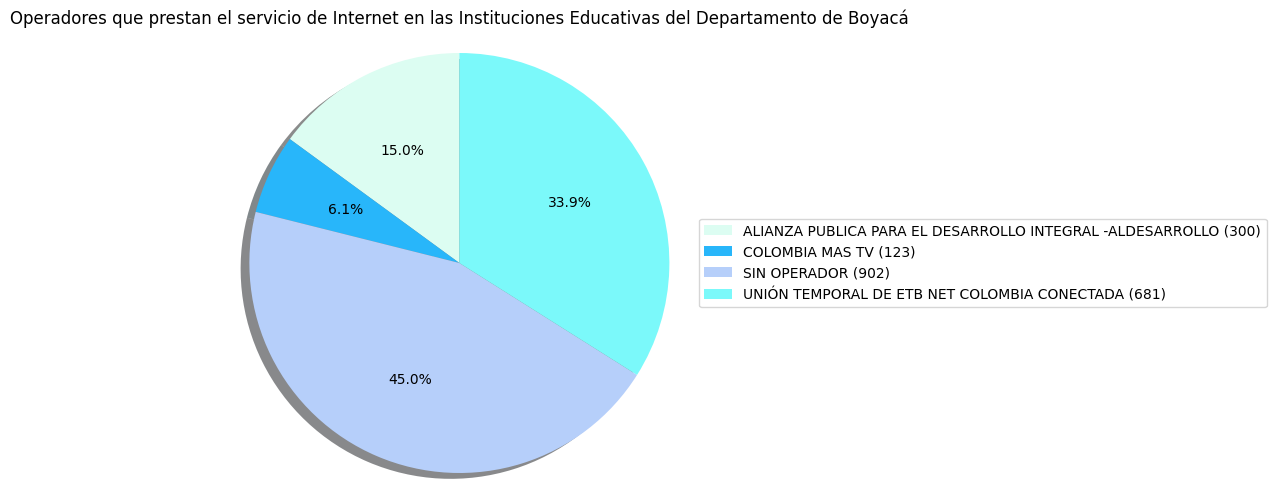

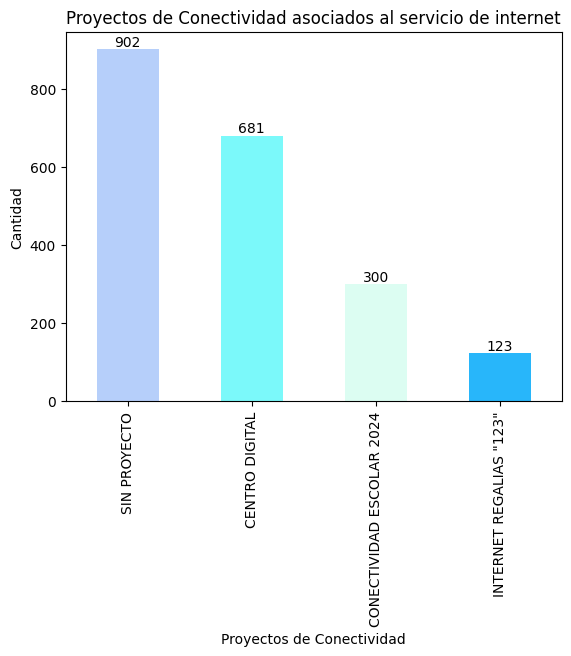

In [14]:
#Ahora haremos enfasis en los operadores que prestan el servicio de internet a las instituciones educativas del departamento.

#Definimos las variables con las que vamos a trabajar:

operadores = df.groupby('OPERADOR')['ZONA'].count()
etiquetas = [f"{OPERADOR} ({cantidad})" for OPERADOR, cantidad in operadores.items()]

# Definimos los parámetros de la gráfica de torta, para que nos muestre los operadores que prestan el servicio de internet: 
plt.figure(figsize=(10, 6))
plt.pie(operadores, autopct='%1.1f%%', startangle=90,colors=['#DCFDF2','#28B6FA', '#B6CFFA', '#7BF9FA'] ,shadow={'ox': -0.03,'edgecolor': 'none', 'shade': 0.9})
plt.title("Operadores que prestan el servicio de Internet en las Instituciones Educativas del Departamento de Boyacá", loc='center')
plt.legend(etiquetas, loc='center left', bbox_to_anchor=(0.8, 0.5))
plt.axis('equal')
plt.show()

#Definimos las variables para mostrar los proyectos de conectividad asociados a los operadores que prestan el servicio de internet
proyectos_conec = df['PROYECTOS_CONECTIVIDAD_2024'].value_counts()
proyectos_conec.plot(kind='bar', color=['#B6CFFA','#7BF9FA', '#DCFDF2', '#28B6FA'])

plt.title("Proyectos de Conectividad asociados al servicio de internet", loc='center')
plt.xlabel("Proyectos de Conectividad")
plt.ylabel("Cantidad")
# Añadir texto encima de cada barra
for i, valor in enumerate(proyectos_conec):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
#Luego de analizar estos datos evidenciamos que cada proyecto de conectividad cuenta con un operador destinado para prestar el servicio de internet, se tendrian que analizar otras variables...
# ....como la calidad del internet que ofrece para preguntarse si esto puede generar algun tipo de riesgo en cuanto a la cobertura y continuidad de los servicios.
